# Question 1

# 1a

We import all required libraries.

In [1]:
import numpy as np
import pandas as pd

We set the filename and read from local path.

In [2]:
gombe_128_filename = 'gombe_128.csv'

Read csv file and store in dataframe sumdf

In [3]:
sumdf = pd.read_csv(gombe_128_filename)

We calculate the median value for impulsive column (reffered to as "impl" in csv).

In [6]:
one_a = sumdf.impl.median()
print('The median impulsiveness score is',one_a)

The median impulsiveness score is 3.333333333


# 1b

We get the number of records with chimpcode length = 3 using sum function.

In [7]:
one_b = sum(1 for code in sumdf.chimpcode if len(code) == 3)
print(one_b,'chimpanzees have 3 numerical digits in their code.')

21 chimpanzees have 3 numerical digits in their code.


# 1c

We use pandas mean function to calculate average.

In [8]:
one_c = np.mean(sumdf.conv - sumdf.decs)
print('The average difference in score between the conventional and decisive traits is', one_c)

The average difference in score between the conventional and decisive traits is -1.2585006086796877


# 1d

We use idmax function to find the column with the max value and mode function to find the prominent characteristic

In [30]:
from scipy.stats import mode

one_d_females = sumdf[sumdf.columns[-6:]][sumdf.sex == 0].idxmax(axis=1).mode().iloc[0]
one_d_males = sumdf[sumdf.columns[-6:]][sumdf.sex == 1].idxmax(axis=1).mode().iloc[0]
print('Most prominent characteristic among females is',one_d_females,'and among males it is',one_d_males)

Most prominent characteristic among females is conscientiousness and among males it is extraversion


# 1e

We can get the correlation table (with absolute values) for the required columns using the following command

In [32]:
corr_matrix = sumdf[sumdf.columns[-6:]].corr(method='pearson').abs()

We want to exclude diagonial and lower (or diagonial and upper) pairs since diagonial are equal to one and the matrix is symmetric

In [33]:
def get_pairs(df):
    #Get lower triangular and diagonial pairs
    dropped_pairs = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            dropped_pairs.add((cols[i], cols[j]))
    return dropped_pairs

Now we have to sort the values with descending order and get the pair with the minimum correlation and its respective value

In [50]:
def get_top_corr(df):
    corr_u = df.corr().abs().unstack()
    labels_to_drop = get_pairs(df)
    corr_u = corr_u.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr_u[0:1]

In [71]:
one_e = get_top_corr(corr_matrix).to_string()
one_e_1 = one_e[0:13]
one_e_2 = one_e[15:26]
one_e_corr = one_e[-8:]
print('The most correlated pair is', one_e_1, '-', one_e_2, 'and their correlation value is',one_e_corr)

The most correlated pair is agreeableness - neuroticism and their correlation value is 0.687029


# 1f

We use idmax function to keep the records whose highest score was sympathetic, set_index function for indexing by chimpcode and keep only the required columns

In [81]:
temp_sympdf = sumdf.loc[sumdf[sumdf.columns[1:27]].idxmax(axis=1) == "symp"].set_index('chimpcode')
sympdf = temp_sympdf[temp_sympdf.columns[2:26]]
print('Sympdf Data Frame is:')
print()
print(sympdf)

Sympdf Data Frame is:

                dom       sol      impl      symp      stbl      invt  \
chimpcode                                                               
E131       2.428571  3.857143  3.000000  5.571429  4.285714  4.142857   
Q450       1.888889  4.666667  3.555556  5.777778  4.111111  4.222222   
Z329       1.333333  3.333333  1.840232  6.666667  4.333333  4.000000   
D191       4.750000  3.250000  4.250000  6.750000  6.500000  6.250000   
W10        2.000000  2.000000  1.666667  5.000000  2.333333  2.333333   
A412       2.666667  3.666667  1.666667  5.333333  3.333333  3.666667   
P325       2.666667  3.000000  3.000000  6.000000  3.000000  4.000000   
C154       2.333333  2.333333  2.666667  6.000000  3.333333  1.666667   
R81        1.333333  4.333333  3.333333  5.000000  3.666667  3.000000   
X489       2.333333  4.666667  2.666667  5.000000  3.666667  2.333333   
R312       2.333333  4.333333  2.000000  6.000000  4.000000  3.666667   
Q461       1.333333  3.33333

# 1g

We will include column chimpcode in a new dataframe(sympdf_2) to use it for converting to long data format, using melt function)

In [103]:
temp_sumdf_2 = sumdf[sumdf.columns[0:27]]
sumdf_2 = temp_sumdf_2[temp_sumdf_2.columns[3:27]]
sumdf_2.insert(0, 'chimpcode', temp_sumdf_2.chimpcode)
sumdf_2.set_index('chimpcode')
sumdf_long_format = pd.melt(sumdf_2, id_vars=['chimpcode'] , value_vars=['dom','sol','impl','symp','stbl','invt','depd','soc','thotl','help','exct','inqs','decs','indv','reckl','sens','unem','cur','vuln','actv','pred','conv','cool','innov'], var_name='traits', value_name='score')
print('The data frame in long format is:')
print()
sumdf_long_format

The data frame in long format is:



,chimpcode,traits,score
0,E131,dom,2.428571
1,P70,dom,4.666667
2,G74,dom,3.333333
3,A364,dom,1.666667
4,B89,dom,3.000000
5,G19,dom,4.000000
6,Z201,dom,3.000000
7,N319,dom,3.333333
8,K58,dom,3.000000
9,X261,dom,3.333333


# 1h

For question (1h) we will create a copy of data frame(s) sorted by chimpcode.

In [126]:
sumdf_lf_s = sumdf_long_format.sort_values(by=['chimpcode'])
s = sumdf_lf_s.sort_values(by=['chimpcode','traits']) 
s = s.reset_index(drop = True) #Drop index to sort s alphabetically

Now we will create a (128x128) list of lists structure, called rows_corr_matrix.

After the end of loops, position i,j of rows_corr_matrix will contain the sum of absolute difference of all traits between chimp corresponding to values i and j.

Hint: Minimum indexing value 0 corresponds to the first chimp (alphabetically sorted) with chimpcode 'A412' and so on. 

For example: Correlation between chimp[0] and chimp[1] is given by rows_corr_matrix[0][1] and is the sum:
|s[0]- s[24]| + |s[1]-2[25]| + ... + |s[23]-s[47]|.

Final Matrix is symmetric. 

In [128]:
rows_corr_matrix = [[0 for x in range(128)] for y in range(128)] 
index_i = 0 #index gives index of pair΄s first chimp
index_j = 0 #index gives index of pair΄s second chimp
minimum = float('inf') #initialize to a high value to ensure it will be replaced later by minimum value
#Minimum value is the minimun(sum of absolute differences between every pair of chimps for all traits) over the set of chimps.
rows_corr_matrix
for i in range(128):
    for j in range(128):
        if i != j:
            for k in range(0,24):
                rows_corr_matrix[i][j] += abs(s['score'][24*i+k] - s['score'][24*j+k]) #add absolute value of difference in every loop
            if rows_corr_matrix[i][j] < minimum:
                minimum = rows_corr_matrix[i][j]
                index_i = i
                index_j = j
print(minimum, index_i , ' ', index_j)

9.000000002 16   84


Now we have the indexes of the pairs and the corresponding minimum value (9.000000002).

But we need the chimpcodes. It is easy to find from s multiplying index by 24, given the way s is structures:

In [129]:
first_chimp = s['chimpcode'][index_i*24] 
second_chimp = s['chimpcode'][index_j*24]
print('The pair of chimpanzees that are the most similar is chimpanzees with chimpcodes',first_chimp,'and', second_chimp,'respectively.')

The pair of chimpanzees that are the most similar is chimpanzees with chimpcodes D224 and Q217 respectively.


# 1i

We are reading ratings file and store it in ratdf dataframe:

In [130]:
gombe_460_filename = 'gombe_460.csv'

We need something like COUNT DISTINCT in SQL. We will use nunique function of pandas:

In [132]:
ratdf = pd.read_csv(gombe_460_filename)
one_i = ratdf.ratercode.nunique()
print('There are', one_i, 'different raters.')

There are 18 different raters.


# ij

We will user function value_counts which counts unique values and the times the appered.

By default, it retuns the rows in descending order, so we just have to get the first one by using the head function.

In [142]:
one_j = ratdf.ratercode.value_counts().head(1)
one_j_rater = one_j.to_string()[0:1]
one_j_num = one_j.iloc[0]
print('Rater',one_j_rater,'rated the most chimpanzees, with',one_j_num,'ratings.')

Rater G rated the most chimpanzees, with 35 ratings.


# 1k

We will use function min to calculate the minimum value for column chimp_YOB:

In [144]:
one_k = min(ratdf.chimp_YOB)
print('The oldest chimpanzee was born in',one_k,'.')

The oldest chimpanzee was born in 1919 .


# 1l

We will use function value_counts to calculate number of raters for every chimp and reset_index function to include index as a column

We will also store the results alphabetically by chimpcode value using sort function

In [152]:
counts = ratdf.chimpcode.value_counts().reset_index()
counts.columns = ['chimpcode', 'raters']
ratcntdf = counts.sort_values(by=['chimpcode'])
print('Data Frame ratcntdf is:')
print()
print(ratcntdf)

Data Frame ratcntdf is:

    chimpcode  raters
54       A100       3
23       A341       5
44       A364       3
56       A383       3
36       A412       3
72        B24       3
47       B396       3
37        B89       3
99       C133       3
125      C141       2
90       C154       3
74       C332       3
39       C352       3
70       D138       3
101      D152       3
26       D191       4
104      D224       3
69        D38       3
116      E125       3
3        E131       7
82       E163       3
4        E182       6
19       E274       6
8        E421       6
88       F145       3
61        F17       3
81       F225       3
80       F357       3
117      G103       3
64        G19       3
..        ...     ...
9        T137       6
77       T215       3
93       T362       3
118      T466       3
29       U150       3
67       U228       3
95       U376       3
126      U464       2
31        U97       3
122      V128       3
85       V331       3
58       V467       3
55     

# 1m

For question (1m), we will use pandas join function and chimpcode as index for both dataframes.

By default, all columns are kept and chimpcode appears once in every row (no reason to appear twice since it is the same on join result).

In [153]:
one_m = ratdf.set_index('chimpcode').join(ratcntdf.set_index('chimpcode'))
print('The result of the join is:')
print()
print(one_m)

The result of the join is:

          ratercode  sex  community  chimp_YOB  month  day  year  \
chimpcode                                                          
A100              B    0          1       1989     10   19  2010   
A100              C    0          1       1989     10   24  2010   
A100              V    0          1       1989     10   26  2010   
A341              E    1          0       1986      9    6  2011   
A341              M    1          0       1986      8   20  2011   
A341              Q    1          0       1986      8   21  2011   
A341              N    1          0       1986      8   21  2011   
A341              A    1          0       1986      8   21  2011   
A364              N    0          0       1992      8   21  2011   
A364              Q    0          0       1992      8   21  2011   
A364              A    0          0       1992      8   21  2011   
A383              B    1          1       1988     10   19  2010   
A383              C 

# Question 2

# 2a

First of all, we load json lib and we include the snippet which loads json object.

In [160]:
import json
yelp_file = 'yelp_academic_dataset_business.json'
yelp_rows = [json.loads(line) for line in open(yelp_file)]
yelpdf = pd.DataFrame(yelp_rows)
yelpdf

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business
1,"{'Parking': {'garage': False, 'street': False,...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business
2,"{'Parking': {'garage': False, 'street': False,...",7lbvsGKzhjuX3oJtaXJvOg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",33.383123,-111.964485,Forever 21,[],True,7,3.5,AZ,business
3,{},gjxoKVsRJwEoa8zd9XxlAw,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",33.356472,-111.857818,Loving Hands Pet Care,[],True,4,5.0,AZ,business
4,{},V28yjMqyZnbCtabroJN_aA,"[Veterinarians, Pets]",Phoenix,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},33.538493,-112.097232,Amec Mid-City Animal Hospital,[],True,3,5.0,AZ,business
5,"{'Good for Kids': True, 'Alcohol': 'full_bar',...",ShUDf64NVkwCe8izdUbYuw,"[Mexican, Restaurants]",Phoenix,"5820 W McDowell Rd\nPhoenix, AZ 85035","{'Monday': {'close': '06:00', 'open': '06:00'}...",33.466373,-112.184772,Los Armandos Asadero Y Mariscos,[],True,3,5.0,AZ,business
6,{'Accepts Credit Cards': False},-orgn4aQoie80CiWcoqkqg,"[Real Estate Services, Property Management, Ho...",Scottsdale,"7525 E Camelback Road\nScottsdale, AZ 85251",{},33.502459,-111.919222,Clayton Companies,[],False,3,5.0,AZ,business
7,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",mQfT3JYu18HN22DVylcE7A,"[Bakeries, Food, Breakfast & Brunch, Sandwiche...",Phoenix,"3134 E Indian School Rd\nPhoenix, AZ 85018","{'Monday': {'close': '15:30', 'open': '07:30'}...",33.495216,-112.014454,Bertha's Café,[],True,177,4.5,AZ,business
8,"{'Parking': {'garage': False, 'street': False,...",cqXv3w9Mf-aVi4PPRspfFQ,"[Art Supplies, Shopping, Framing, Arts & Crafts]",Tempe,"4421 S Rural Rd\nTempe, AZ 85282","{'Monday': {'close': '19:00', 'open': '10:00'}...",33.384050,-111.926310,Jerry's Artarama,[],True,21,4.0,AZ,business
9,{'Good for Kids': True},C2FC_hsVG4rupRESeUnrcA,"[Active Life, Massage Therapy, Health & Medica...",Cave Creek,"Cave Creek, AZ 85331",{},33.833372,-111.950704,Shauna Brown Fitness,[],True,5,5.0,AZ,business


We use function count in records where column 'name' is Starbucks:

In [155]:
two_a = yelpdf.loc[yelpdf.name == 'Starbucks','name'].count()
print('There are',two_a,'Starbucks in this data frame.')

There are 83 Starbucks in this data frame.


# 2b

We will import regular expressions lib.

We will use regular expression '^(\d{5})\d{5}$' for matching 5-digit zipcode at the end of the line.

Finally, warning related to match groups raised my str.contains function will be ignored.

In [156]:
import re
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

yelpdf.full_address.filter(like=r'^(\d{5})\d{5}$', axis=0).count()
yelpdf.full_address
two_b = yelpdf.loc[yelpdf.full_address.str.contains('.*(\d{5}(\-\d{4})?)$') == False,'full_address'].count()
print('The number of rows not containing zip code is', two_b)

The number of rows not containing zip code is 64


# 2c

Function drop will be used to drop rows that do not contain zipcode.

In [151]:
yelpdf = yelpdf.drop(yelpdf[yelpdf.full_address.str.contains('.*(\d{5}(\-\d{4})?)$') == False].index)

In [162]:
yelpdf

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business
1,"{'Parking': {'garage': False, 'street': False,...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business
2,"{'Parking': {'garage': False, 'street': False,...",7lbvsGKzhjuX3oJtaXJvOg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",33.383123,-111.964485,Forever 21,[],True,7,3.5,AZ,business
3,{},gjxoKVsRJwEoa8zd9XxlAw,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",33.356472,-111.857818,Loving Hands Pet Care,[],True,4,5.0,AZ,business
4,{},V28yjMqyZnbCtabroJN_aA,"[Veterinarians, Pets]",Phoenix,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},33.538493,-112.097232,Amec Mid-City Animal Hospital,[],True,3,5.0,AZ,business
5,"{'Good for Kids': True, 'Alcohol': 'full_bar',...",ShUDf64NVkwCe8izdUbYuw,"[Mexican, Restaurants]",Phoenix,"5820 W McDowell Rd\nPhoenix, AZ 85035","{'Monday': {'close': '06:00', 'open': '06:00'}...",33.466373,-112.184772,Los Armandos Asadero Y Mariscos,[],True,3,5.0,AZ,business
6,{'Accepts Credit Cards': False},-orgn4aQoie80CiWcoqkqg,"[Real Estate Services, Property Management, Ho...",Scottsdale,"7525 E Camelback Road\nScottsdale, AZ 85251",{},33.502459,-111.919222,Clayton Companies,[],False,3,5.0,AZ,business
7,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",mQfT3JYu18HN22DVylcE7A,"[Bakeries, Food, Breakfast & Brunch, Sandwiche...",Phoenix,"3134 E Indian School Rd\nPhoenix, AZ 85018","{'Monday': {'close': '15:30', 'open': '07:30'}...",33.495216,-112.014454,Bertha's Café,[],True,177,4.5,AZ,business
8,"{'Parking': {'garage': False, 'street': False,...",cqXv3w9Mf-aVi4PPRspfFQ,"[Art Supplies, Shopping, Framing, Arts & Crafts]",Tempe,"4421 S Rural Rd\nTempe, AZ 85282","{'Monday': {'close': '19:00', 'open': '10:00'}...",33.384050,-111.926310,Jerry's Artarama,[],True,21,4.0,AZ,business
9,{'Good for Kids': True},C2FC_hsVG4rupRESeUnrcA,"[Active Life, Massage Therapy, Health & Medica...",Cave Creek,"Cave Creek, AZ 85331",{},33.833372,-111.950704,Shauna Brown Fitness,[],True,5,5.0,AZ,business


We observe that yelpdf now has 15521 rows, instead of 15585 that it had at first, which means 64 rows were dropped as expected.5

Now, using .str series we convert each full address to string and get the last 5 digits of each, which we set as value at new column zip_code.

In [163]:
yelpdf['zip_code'] = yelpdf.full_address.str[-5:]
print('The updated yelpdf Data Frame is:')
print()
yelpdf

The updated yelpdf Data Frame is:



,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,zip_code
0,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",O_X3PGhk3Y5JWVi866qlJg,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",33.638573,-112.092329,Turf Paradise Race Course,[],True,29,4.0,AZ,business,85023
1,"{'Parking': {'garage': False, 'street': False,...",QbrM7wqtmoNncqjc6GtFaQ,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},33.648545,-112.234755,Sam's Club Members Only,[],True,3,3.5,AZ,business,85308
2,"{'Parking': {'garage': False, 'street': False,...",7lbvsGKzhjuX3oJtaXJvOg,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",33.383123,-111.964485,Forever 21,[],True,7,3.5,AZ,business,85282
3,{},gjxoKVsRJwEoa8zd9XxlAw,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",33.356472,-111.857818,Loving Hands Pet Care,[],True,4,5.0,AZ,business,85225
4,{},V28yjMqyZnbCtabroJN_aA,"[Veterinarians, Pets]",Phoenix,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},33.538493,-112.097232,Amec Mid-City Animal Hospital,[],True,3,5.0,AZ,business,85021
5,"{'Good for Kids': True, 'Alcohol': 'full_bar',...",ShUDf64NVkwCe8izdUbYuw,"[Mexican, Restaurants]",Phoenix,"5820 W McDowell Rd\nPhoenix, AZ 85035","{'Monday': {'close': '06:00', 'open': '06:00'}...",33.466373,-112.184772,Los Armandos Asadero Y Mariscos,[],True,3,5.0,AZ,business,85035
6,{'Accepts Credit Cards': False},-orgn4aQoie80CiWcoqkqg,"[Real Estate Services, Property Management, Ho...",Scottsdale,"7525 E Camelback Road\nScottsdale, AZ 85251",{},33.502459,-111.919222,Clayton Companies,[],False,3,5.0,AZ,business,85251
7,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",mQfT3JYu18HN22DVylcE7A,"[Bakeries, Food, Breakfast & Brunch, Sandwiche...",Phoenix,"3134 E Indian School Rd\nPhoenix, AZ 85018","{'Monday': {'close': '15:30', 'open': '07:30'}...",33.495216,-112.014454,Bertha's Café,[],True,177,4.5,AZ,business,85018
8,"{'Parking': {'garage': False, 'street': False,...",cqXv3w9Mf-aVi4PPRspfFQ,"[Art Supplies, Shopping, Framing, Arts & Crafts]",Tempe,"4421 S Rural Rd\nTempe, AZ 85282","{'Monday': {'close': '19:00', 'open': '10:00'}...",33.384050,-111.926310,Jerry's Artarama,[],True,21,4.0,AZ,business,85282
9,{'Good for Kids': True},C2FC_hsVG4rupRESeUnrcA,"[Active Life, Massage Therapy, Health & Medica...",Cave Creek,"Cave Creek, AZ 85331",{},33.833372,-111.950704,Shauna Brown Fitness,[],True,5,5.0,AZ,business,85331


# 2d

We will use function set_index to set a multi-level index in yelpdf:

In [164]:
yelpdf = yelpdf.set_index(['city', 'zip_code','business_id'])
yelpdf

attributes  \
city            zip_code business_id                                                                 
Phoenix         85023    O_X3PGhk3Y5JWVi866qlJg  {'Take-out': False, 'Wi-Fi': 'free', 'Good For...   
Glendale        85308    QbrM7wqtmoNncqjc6GtFaQ  {'Parking': {'garage': False, 'street': False,...   
Tempe           85282    7lbvsGKzhjuX3oJtaXJvOg  {'Parking': {'garage': False, 'street': False,...   
Chandler        85225    gjxoKVsRJwEoa8zd9XxlAw                                                 {}   
Phoenix         85021    V28yjMqyZnbCtabroJN_aA                                                 {}   
                85035    ShUDf64NVkwCe8izdUbYuw  {'Good for Kids': True, 'Alcohol': 'full_bar',...   
Scottsdale      85251    -orgn4aQoie80CiWcoqkqg                    {'Accepts Credit Cards': False}   
Phoenix         85018    mQfT3JYu18HN22DVylcE7A  {'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...   
Tempe           85282    cqXv3w9Mf-aVi4PPRspfFQ  {'Parking': {'garage': False, 'street': False,...   
Cave Creek      85331    C2FC_hsVG4rupRESeUnrcA                            {'Good for Kids': True}   
Chandler        85224    aW1FWcU8uWqlslFOI2Ts1w                                                 {}   
Mesa            85201    MiVcQsXp3TYUmeD7FSa-hA  {'Take-out': True, 'Wi-Fi': 'free', 'Good For'...   
Scottsdale      85251    2agDSZF593OlXDj7SZtVxw  {'By Appointment Only': True, 'Accepts Credit ...   
Gilbert         85297    R37sFq0FJOdnoBxpoJbtWA                                                 {}   
Chandler        85225    y1oqe6pFYzQK08evy8vlLg                                                 {}   
Scottsdale      85256    _IwgdSjrIMwAcQdeLNhcZQ  {'Price Range': 3, 'Alcohol': 'full_bar', 'Goo...   
Queen Creek     85242    ClluhYAaVzuoha89uJmr7g  {'Accepts Credit Cards': True, 'Wi-Fi': 'no', ...   
Phoenix         85042    6fvsIZmmecvphJDiuDFR9w                                                 {}   
Goodyear        85338    tl9XIP5trlkcuSfTQqe5jg  {'Take-out': True, 'Wi-Fi': 'free', 'Drive-Thr...   
Scottsdale      85251    6zXaBSWYQThXT5z9IDY8lw  {'Price Range': 1, 'Hair Types Specialized In'...   
Paradise Valley 85253    lUoiT_fR73R8eMiiIcqMLA  {'Accepts Credit Cards': True, 'Wi-Fi': 'free'...   
Scottsdale      85254    W0eocyGliMbg8NScqERaiA  {'Alcohol': 'full_bar', 'Noise Level': 'loud',...   
Paradise Valley 85253    0A8myHrHPpiZGvGyFIBA1w                      {'By Appointment Only': True}   
Apache Junction 85120    J8T6Fu7RSczrflZ5rC6wvQ                     {'Accepts Credit Cards': True}   
Phoenix         85017    wAs-stW0HP6OXVXdpawnBQ  {'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...   
                85006    5CfsPNHmj7J8l1qXk-USsw                     {'Accepts Credit Cards': True}   
Glendale        85305    sbD4f8aOsXZ6PJYh1kN4Ag  {'Parking': {'garage': False, 'street': False,...   
Phoenix         85023    vf5AdVCI7rEvXF2Falgp_w  {'Accepts Credit Cards': True, 'Wi-Fi': 'free'...   
Glendale        91210    gtQzAiy7D-dPU8WzT3jX3Q  {'Parking': {'garage': False, 'street': False,...   
Phoenix         85016    As7RemQnYJskIBPWUh3MIg  {'Happy Hour': True, 'Accepts Credit Cards': T...   
...                                                                                            ...   
Tempe           85281    bMqkyZZzfJ3CnmrgGBjJGg  {'Take-out': True, 'Wi-Fi': 'free', 'Good For'...   
Scottsdale      85251    ObnZiF99lqggVasgyGBtVA  {'Drive-Thru': False, 'Alcohol': 'full_bar', '...   
Phoenix         85037    eFvze4SYWk_BzEYeXD6uQA  {'By Appointment Only': False, 'Parking': {'ga...   
Chandler        85248    S5GkOuXQLy6YqTmeuuuejg                                                 {}   
Anthem          85086    KU3Y8aya5dLYwzdvgSFpPg  {'By Appointment Only': False, 'Parking': {'ga...   
Phoenix         85085    3E_toMWSUCuhRJzG1eml8Q  {'Take-out': True, 'Wi-Fi': 'no', 'Drive-Thru'...   
Surprise        85374    jLmqqAOiI7r9VCfuZ8NYRw  {'Good For': {'dessert': False, 'latenight': F...   
Tempe   

# 2e

First of all, we import the matplot lib.

In [165]:
import matplotlib.pyplot as plt

%matplotlib inline

Then, we define  the function that performs the Mercator Project.

In [166]:
 def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [167]:
px, py = lat_lng_to_pixels(yelpdf['latitude'], yelpdf['longitude'])

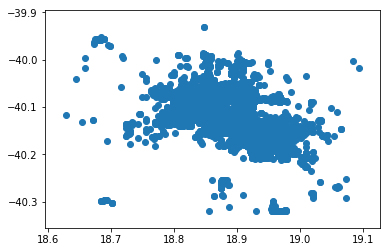

In [168]:
plt.scatter(px, py)

Now we will use axis function to set the limits of our scatter, figure function to adjust its size.

Finally, black and white colors are used.

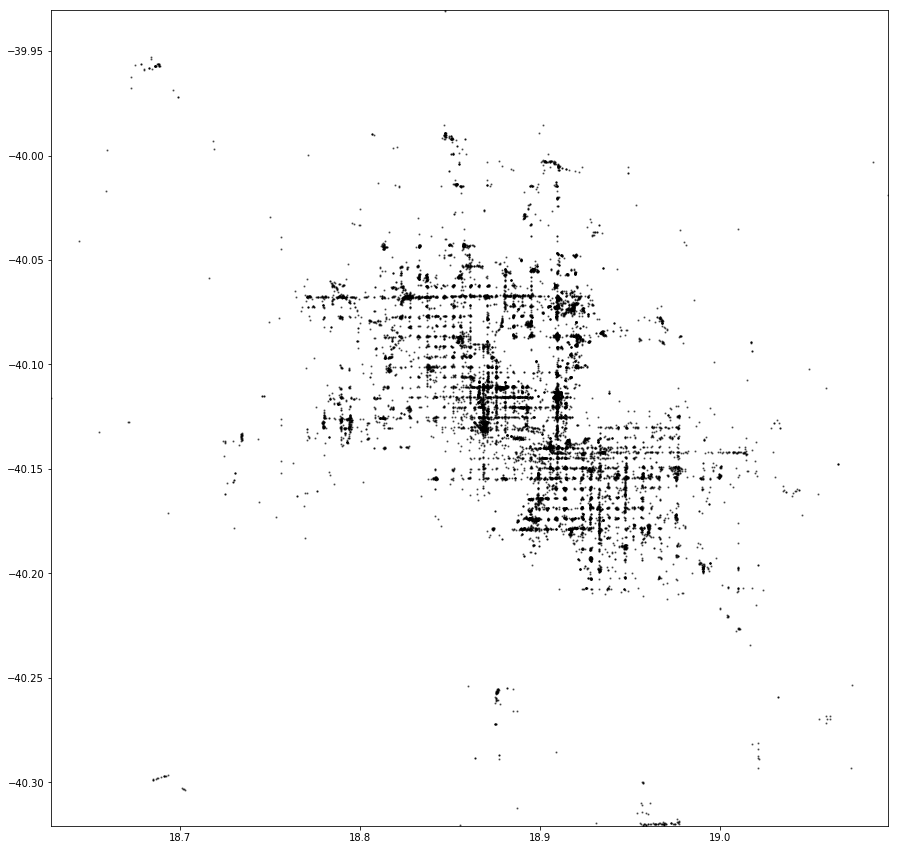

In [230]:
plt.figure(figsize=(15, 15))
plt.axis([min(px),max(px),min(py),max(py)])
plt.gca().set_facecolor('white')
plt.scatter(px, py, s=1.25, alpha=.5, color='black')

# 2f

Each category is a list of lists. We will iterate in every list and add each unique list in a nwe list (cat_list).

Finally, we will get the lenght of the list, using the len function:

In [169]:
cat_list= []
for i in yelpdf.categories:
    for j in i:
        if j not in cat_list:
            cat_list.append(j)
two_f = len(cat_list)
print('There are',two_f,'distinct categories in the Data Frame.')

There are 591 distinct categories in the Data Frame.


# 2g

We use iterrows function to itterate over the dataframe in Glendale dataframe, which has only the rows of yelpdf which are located in Glendale

In [170]:
bakeries_list = []
Glendale = yelpdf.iloc[yelpdf.index.get_level_values('city') == 'Glendale']
for index, row in Glendale.iterrows():
    if 'Bakeries' in (row['categories']):
        bakeries_list.append(row['name'])

bakeries_list

['Nothing Bundt Cakes',
 'European Bakery and Cafe',
 'Paradise Bakery & Cafe',
 'Bitter Sweet Cake Boutique',
 'Village Inn Restaurants',
 "Marie Callender's Restaurants & Bakeries",
 "Woobie's Cookies",
 'Paradise Bakery & Cafe',
 'Ugly Cakes Bakery']

Now using Counter function from collections lib, we find the most common element.

In [203]:
from collections import Counter
bakeries_counts = Counter(bakeries_list)
top = bakeries_counts.most_common(1)
two_g_name = str(top[0])[2:24]
two_g_num = str(top[0])[-2:-1]
two_g_num
print('The most reviewed bakery in Glendale is',two_g_name,',with',two_g_num,'reviews.')

The most reviewed bakery in Glendale is Paradise Bakery & Cafe ,with 2 reviews.


# 2h

We will use a copy of our dataframe (yelpdf_2) to get rows of 5-stars businesses and reset index to perorm a groupby operation.

In [230]:
yelpdf.index.get_level_values('city')
yelpdf_2 = yelpdf[yelpdf.stars == 5].reset_index()
counts = yelpdf_2.groupby(['city']).size().reset_index()
counts.columns = ['City','Num_of_5_stars']
print(counts)

               City  Num_of_5_stars
0         Ahwatukee               1
1            Anthem               5
2   Apache Junction              14
3           Arcadia               1
4          Avondale               9
5           Buckeye               5
6          Carefree               6
7       Casa Grande               4
8        Cave Creek              19
9          Chandler             151
10        El Mirage               6
11   Fountain Hills               9
12          Gilbert              99
13         Glendale              92
14      Gold Canyon               1
15         Goodyear              15
16           Higley               2
17           Laveen               9
18  Litchfield Park               1
19         Maricopa               9
20             Mesa             178
21      North Pinal               1
22  Paradise Valley              12
23           Peoria              50
24          Phoenix             642
25      Queen Creek              13
26   San Tan Valley         